In [1]:
import data_handling as dh


#types = {"tdlgm": "../tdlgm/old_results", "dlgm": "../dlgm/results", "rnn": "../rnn/results"}

types = {"tdlgm": "../tdlgm/results"}

variance_configs = dh.get_variance_configs()

#dh.get_all_files(types["tdlgm"])
#print(dh.lowest_mean_squared_individual_reconstruction(types["tdlgm"]))
#print(dh.lowest_mean_squared_reconstruction(types["tdlgm"]))


for t in types:
    print(dh.bin_diff(types[t]))




individual_reconstruction = []
all_reconstruction = []

    
#dh.lowest_mean_squared_individual_reconstruction(types["rnn"], 0, 1)



#types = {"tdlgm": "../tdlgm/old_results", "dlgm": "../dlgm/results", "rnn": "../rnn/results"}


/home/carladm/Documents/tDLGM/experiments/data_parsing/data_gen.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = df.max()[0]
/home/carladm/Documents/tDLGM/experiments/data_parsing/data_gen.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = df.max()[0]


{'name': '../tdlgm/results/seq_len12,layers2,latent64,hidden64,l0.001,variance0.01,data_prob1.0,regularization0.14285714285714285entries.json', 'value': 0.8344985483785414}


In [2]:

for conf in variance_configs:
    for model in types:
        res = dh.lowest_mean_squared_individual_reconstruction(types[model], conf["variance"], conf["probability"])
        individual_reconstruction.append(res)
        print(model, conf, res["value"])

        res = dh.lowest_mean_squared_reconstruction(types[model], conf["variance"], conf["probability"])
        all_reconstruction.append(res)
        print(model, conf, res["value"])

tdlgm {'variance': 0.001, 'probability': 0.2} 0.025884638316343626
tdlgm {'variance': 0.001, 'probability': 0.2} 0.024700213096851553
tdlgm {'variance': 0.01, 'probability': 0.4} 0.02563106266158866
tdlgm {'variance': 0.01, 'probability': 0.4} 0.02505681653103238
tdlgm {'variance': 0.005, 'probability': 0.6} 0.023059282813453826
tdlgm {'variance': 0.005, 'probability': 0.6} 0.02426437068106179
tdlgm {'variance': 0.05, 'probability': 0.8} 0.022327027164705214
tdlgm {'variance': 0.05, 'probability': 0.8} 0.024736452226675112
tdlgm {'variance': 0, 'probability': 1} 0.02355962242470833
tdlgm {'variance': 0, 'probability': 1} 0.024780769905940712


Variance:  0.001  Probability:  0.2
tdlgm Mean:	 -0.005331807728296075 	Var:	 0.0024478671503191957


Variance:  0.01  Probability:  0.4
tdlgm Mean:	 -0.005987644737154187 	Var:	 0.0025680457317062227


Variance:  0.005  Probability:  0.6
tdlgm Mean:	 -0.005730675800428344 	Var:	 0.0024314830269157248


Variance:  0.05  Probability:  0.8
tdlgm Mean:	 -0.0058109410237902805 	Var:	 0.0025251393458101215


Variance:  0  Probability:  1
tdlgm Mean:	 -0.004744911294682799 	Var:	 0.002495605794800415




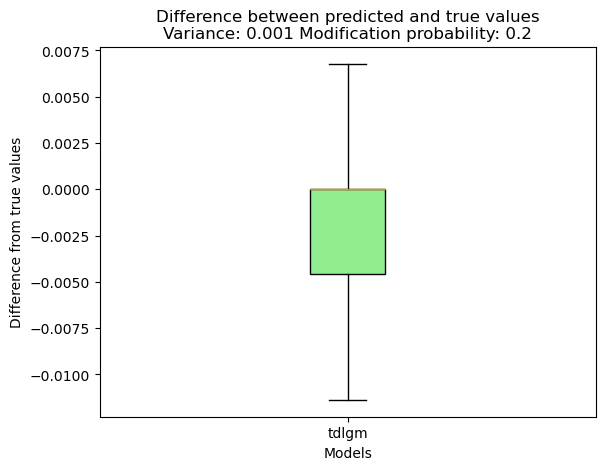

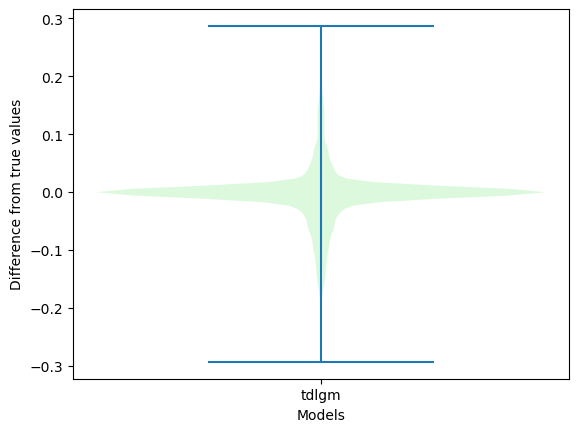

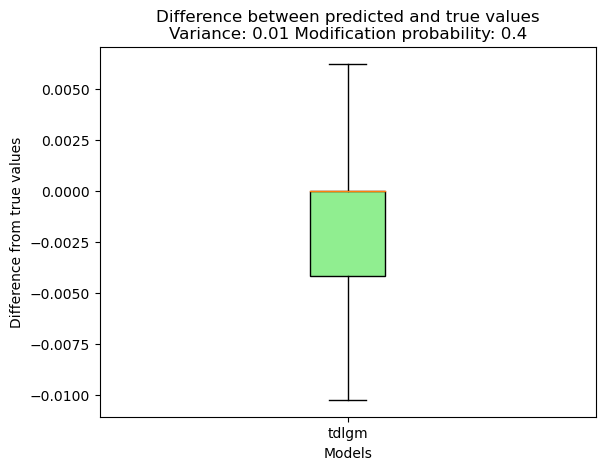

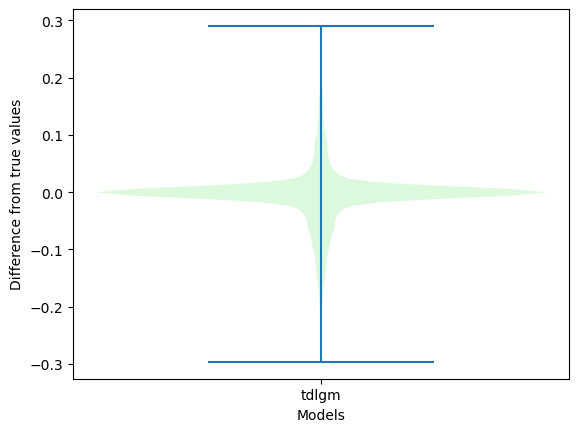

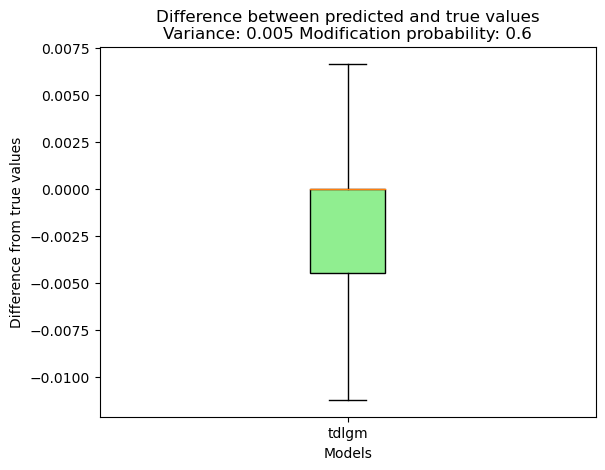

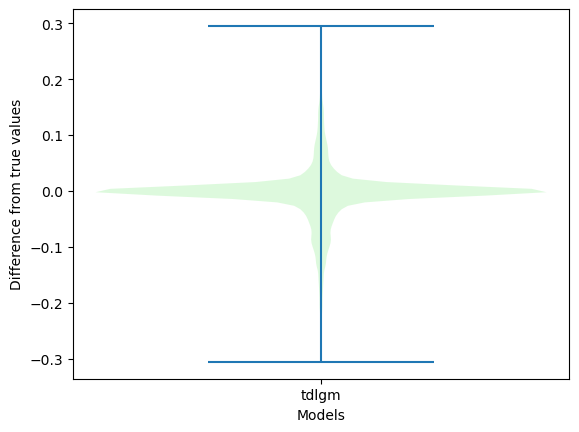

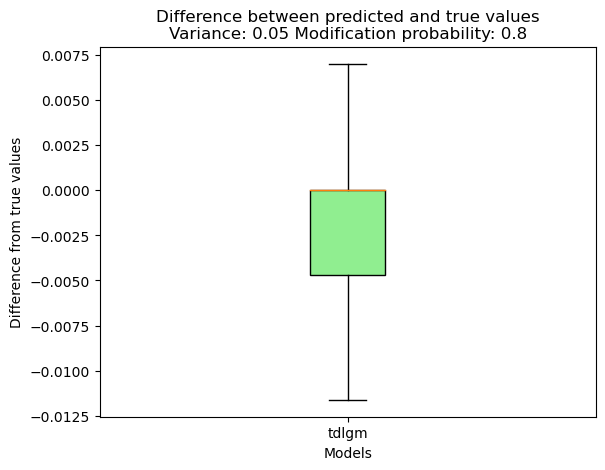

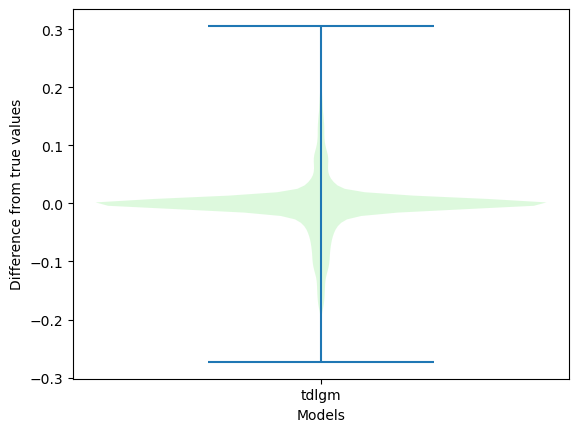

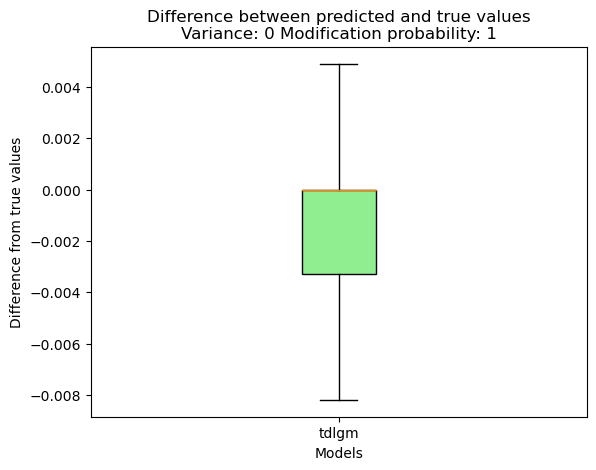

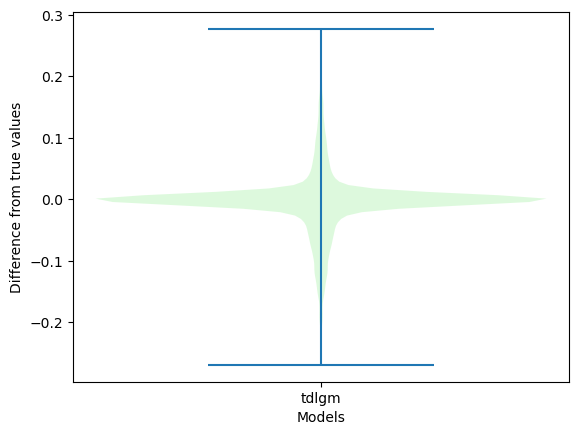

In [3]:
import entry_parsing as ep
import numpy as np


for conf in variance_configs:
    data = []
    labels = []
    for model in types:
        for i in individual_reconstruction:
            if i["variance"] != conf["variance"] or i["probability"] != conf["probability"]:
                continue
            check = "/" + model
            if check not in i["name"]:
                continue
            f = dh.get_file(i["name"])[0]
            for run in f["test_run"]:
                if run["variance"] != conf["variance"] or run["probability"] != conf["probability"]:
                    continue
                to_add = np.array([])
                for j in run["diff"]:
                    to_add = np.concatenate((to_add,np.array(j)))
                data.append(to_add)
                labels.append(model)
    title = "Difference between predicted and true values\nVariance: " + str(conf["variance"]) + " Modification probability: " + str(conf["probability"])
    ep.boxplot_two_values(data,labels, "Models", "Difference from true values", title=title)

    print("Variance: ", conf["variance"], " Probability: ", conf["probability"])
    for d, l in zip(data, labels):
        print(l , "Mean:\t", np.mean(d), "\tVar:\t", np.var(d))
    print()
    print()
                    
                
            
            
        

/home/carladm/Documents/tDLGM/experiments/data_parsing/data_gen.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = df.max()[0]
/home/carladm/Documents/tDLGM/experiments/data_parsing/data_gen.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = df.max()[0]


------------------------- TDLGM -------------------------
		Prob: 0.200000, Var: 0.001000 
		Score: 0.002476 Mean: -0.005332, Var: 0.002448


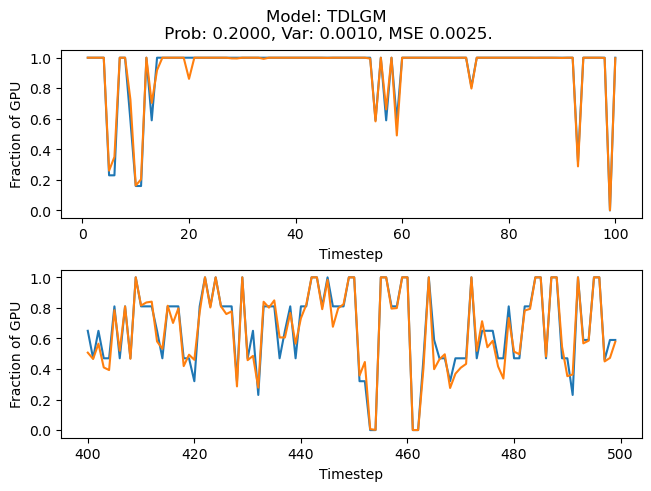

		Prob: 0.400000, Var: 0.010000 
		Score: 0.002604 Mean: -0.005988, Var: 0.002568


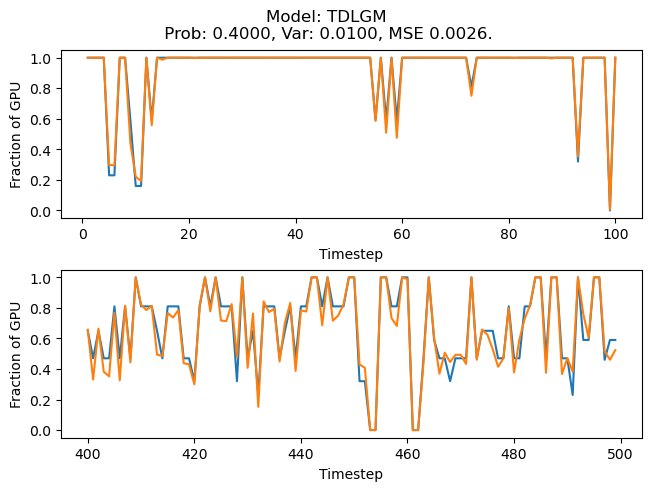

		Prob: 0.600000, Var: 0.005000 
		Score: 0.002464 Mean: -0.005731, Var: 0.002431


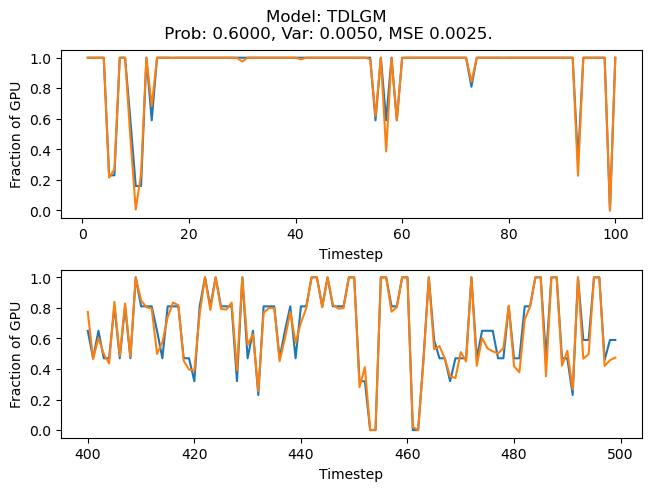

		Prob: 0.800000, Var: 0.050000 
		Score: 0.002559 Mean: -0.005811, Var: 0.002525


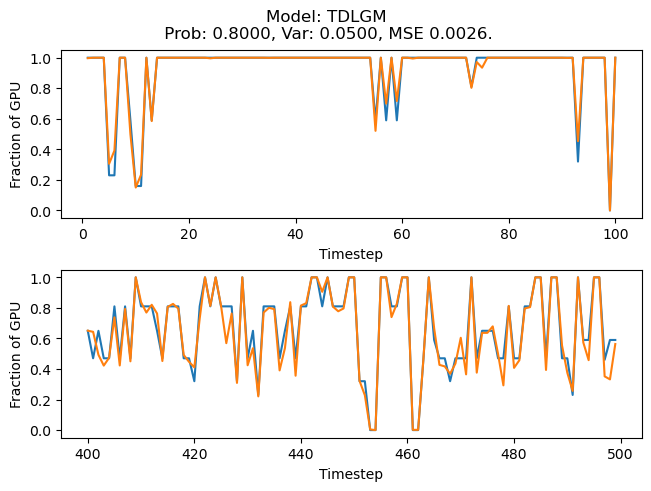

		Prob: 1.000000, Var: 0.000000 
		Score: 0.002518 Mean: -0.004745, Var: 0.002496


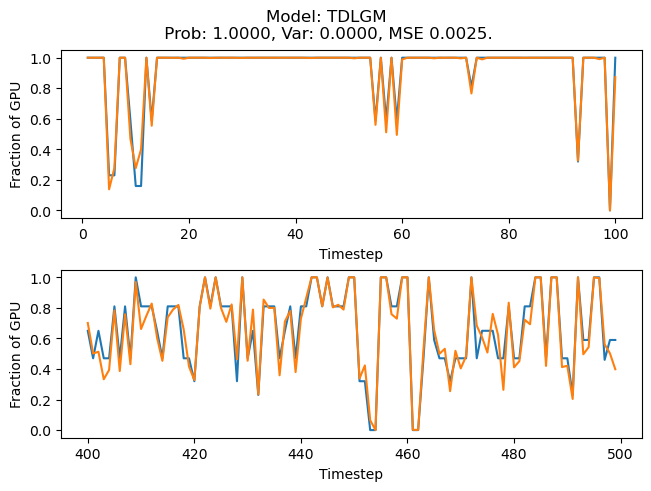

------------------------- TDLGM -------------------------
		Prob: 0.200000, Var: 0.001000 
		Score: 0.002476 Mean: -0.005332, Var: 0.002448


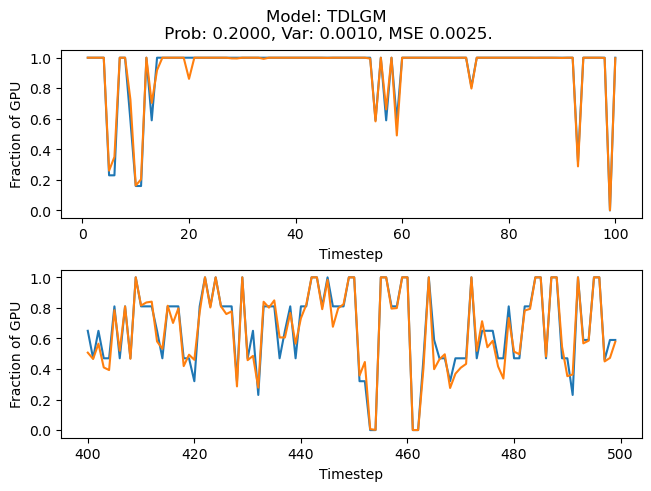

		Prob: 0.400000, Var: 0.010000 
		Score: 0.002604 Mean: -0.005988, Var: 0.002568


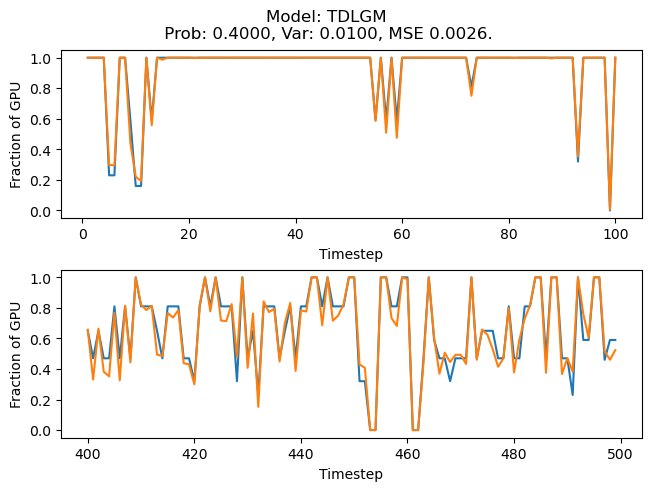

		Prob: 0.600000, Var: 0.005000 
		Score: 0.002464 Mean: -0.005731, Var: 0.002431


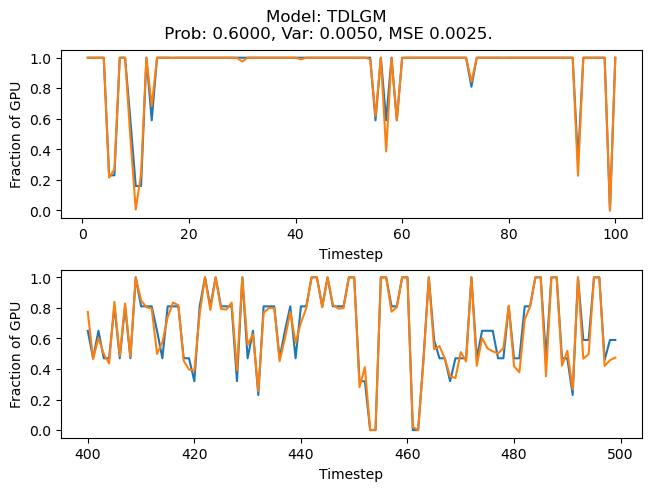

		Prob: 0.800000, Var: 0.050000 
		Score: 0.002559 Mean: -0.005811, Var: 0.002525


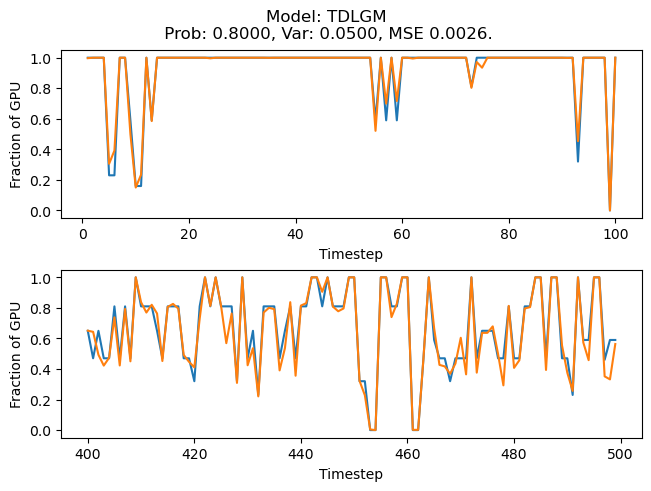

		Prob: 1.000000, Var: 0.000000 
		Score: 0.002518 Mean: -0.004745, Var: 0.002496


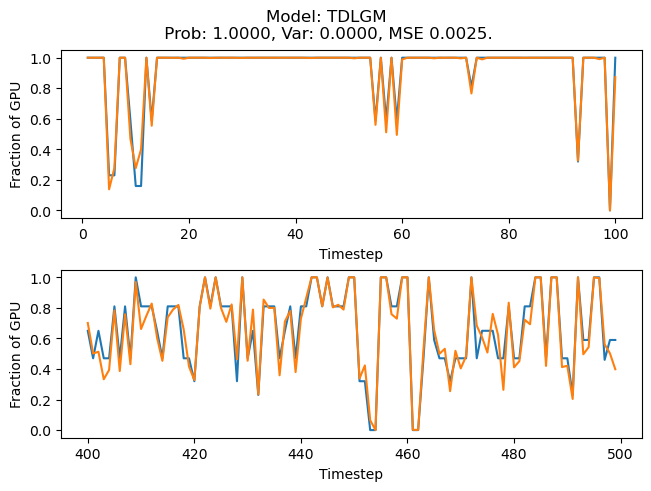

------------------------- TDLGM -------------------------
		Prob: 0.200000, Var: 0.001000 
		Score: 0.002476 Mean: -0.005332, Var: 0.002448


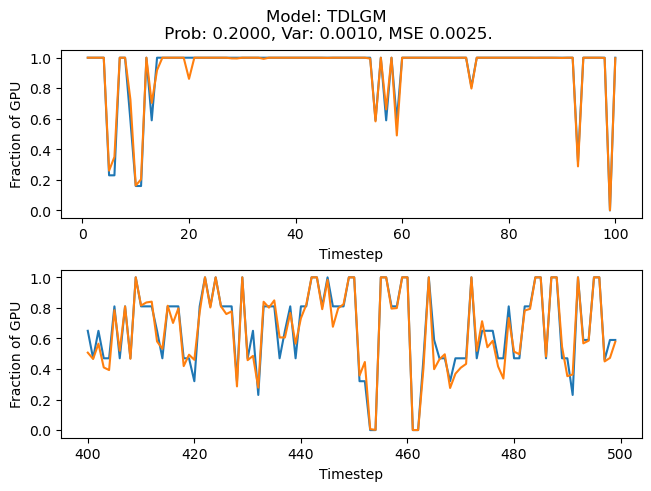

		Prob: 0.400000, Var: 0.010000 
		Score: 0.002604 Mean: -0.005988, Var: 0.002568


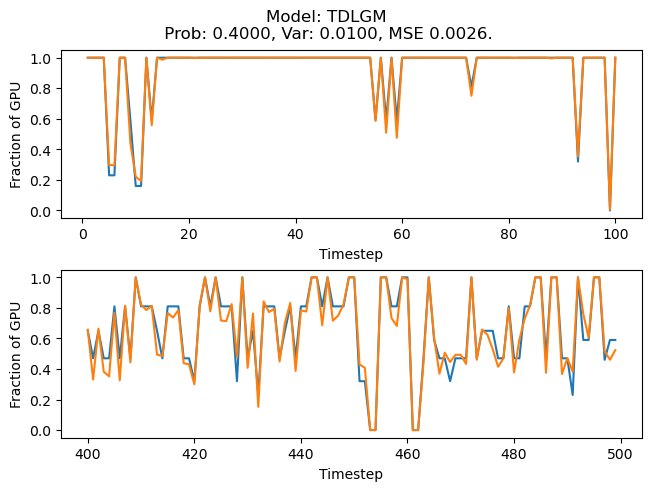

		Prob: 0.600000, Var: 0.005000 
		Score: 0.002464 Mean: -0.005731, Var: 0.002431


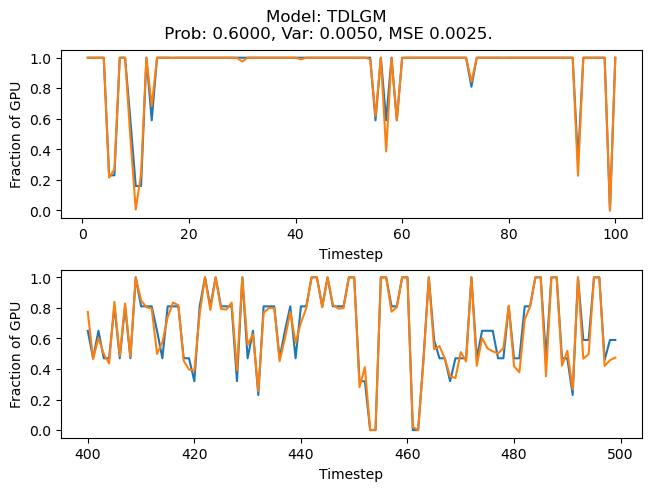

		Prob: 0.800000, Var: 0.050000 
		Score: 0.002559 Mean: -0.005811, Var: 0.002525


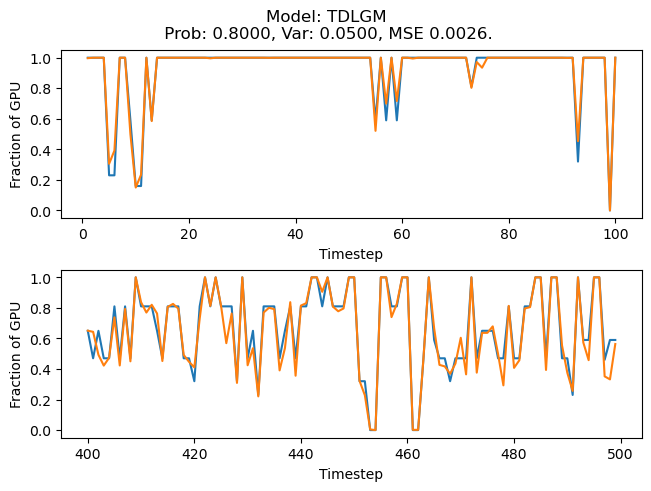

		Prob: 1.000000, Var: 0.000000 
		Score: 0.002518 Mean: -0.004745, Var: 0.002496


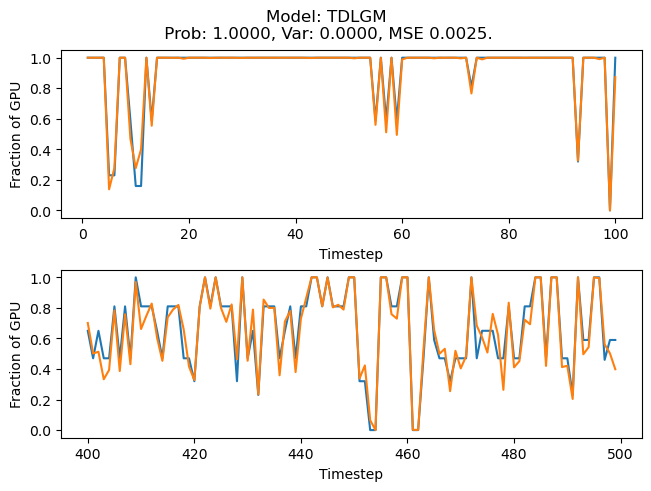

------------------------- TDLGM -------------------------
		Prob: 0.200000, Var: 0.001000 
		Score: 0.002476 Mean: -0.005332, Var: 0.002448


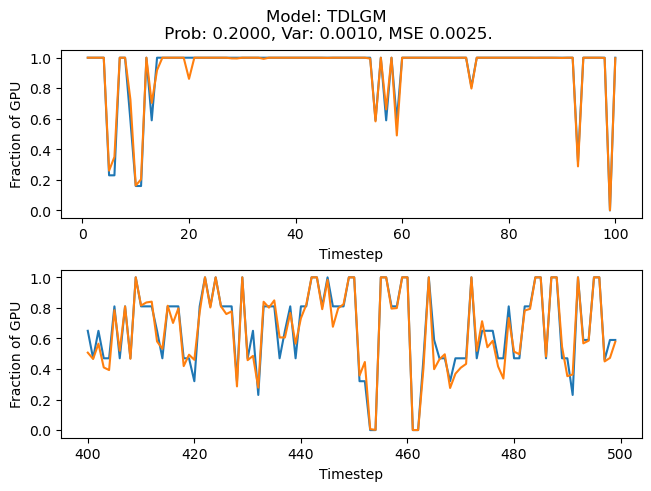

		Prob: 0.400000, Var: 0.010000 
		Score: 0.002604 Mean: -0.005988, Var: 0.002568


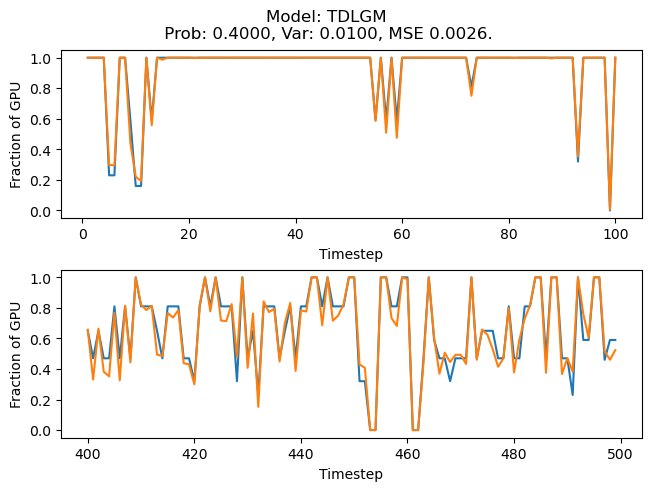

		Prob: 0.600000, Var: 0.005000 
		Score: 0.002464 Mean: -0.005731, Var: 0.002431


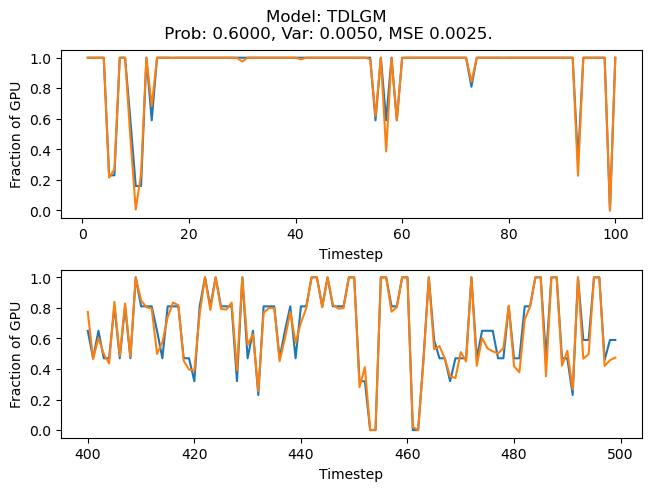

		Prob: 0.800000, Var: 0.050000 
		Score: 0.002559 Mean: -0.005811, Var: 0.002525


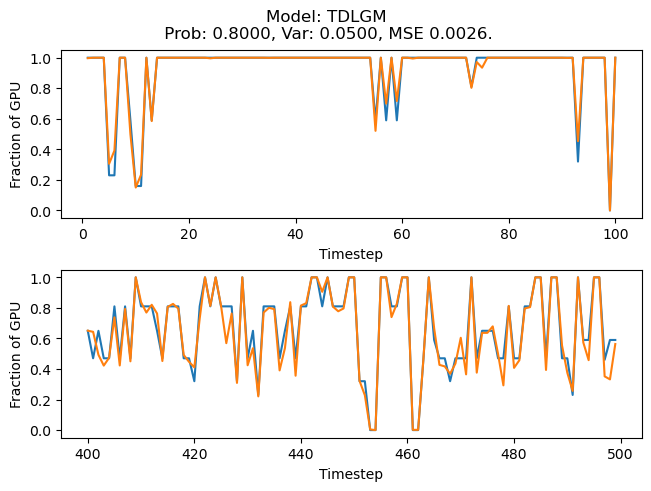

		Prob: 1.000000, Var: 0.000000 
		Score: 0.002518 Mean: -0.004745, Var: 0.002496


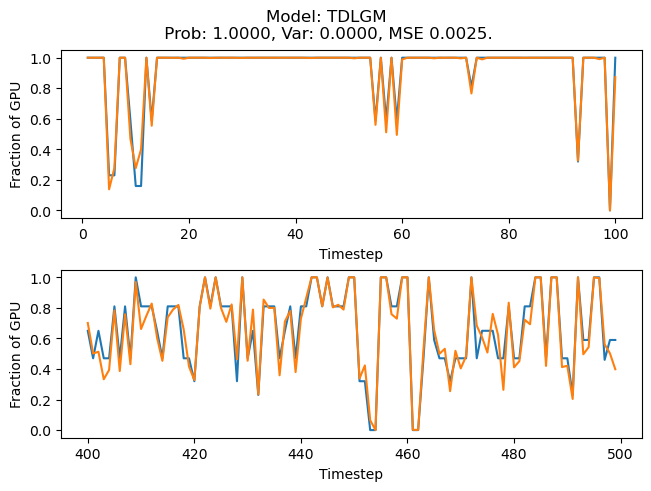

------------------------- TDLGM -------------------------
		Prob: 0.200000, Var: 0.001000 
		Score: 0.002476 Mean: -0.005332, Var: 0.002448


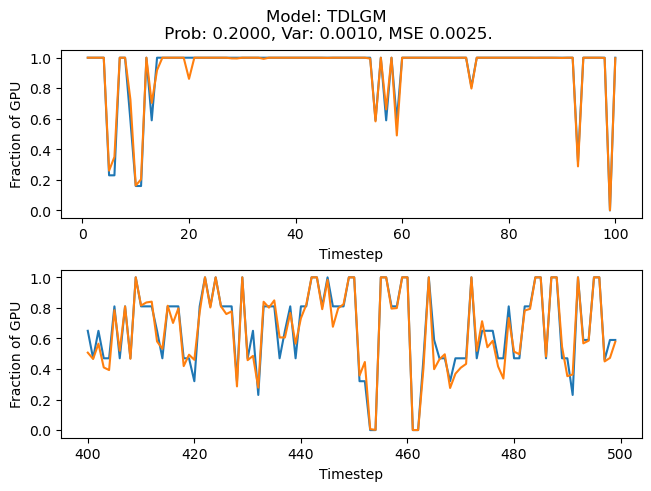

		Prob: 0.400000, Var: 0.010000 
		Score: 0.002604 Mean: -0.005988, Var: 0.002568


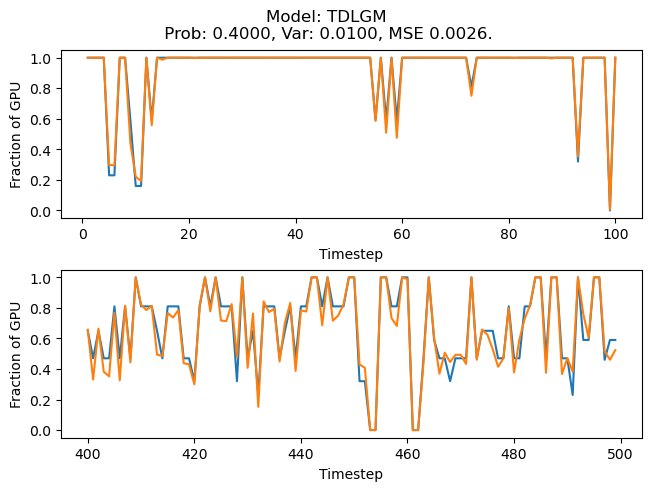

		Prob: 0.600000, Var: 0.005000 
		Score: 0.002464 Mean: -0.005731, Var: 0.002431


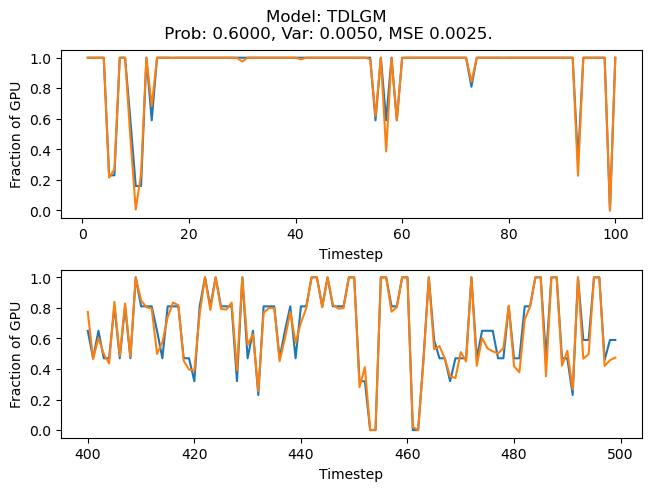

		Prob: 0.800000, Var: 0.050000 
		Score: 0.002559 Mean: -0.005811, Var: 0.002525


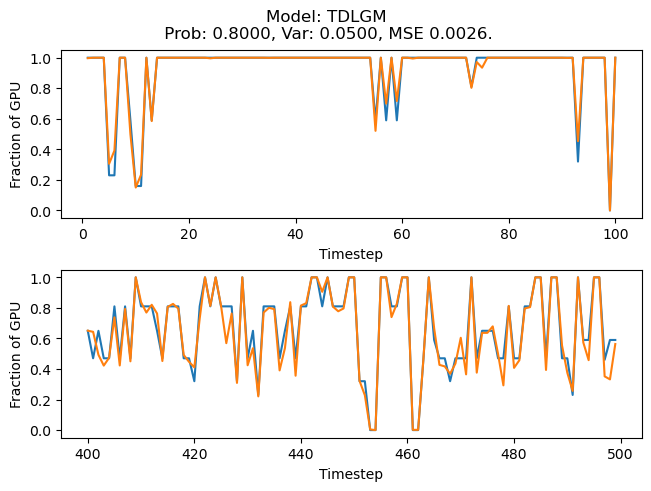

		Prob: 1.000000, Var: 0.000000 
		Score: 0.002518 Mean: -0.004745, Var: 0.002496


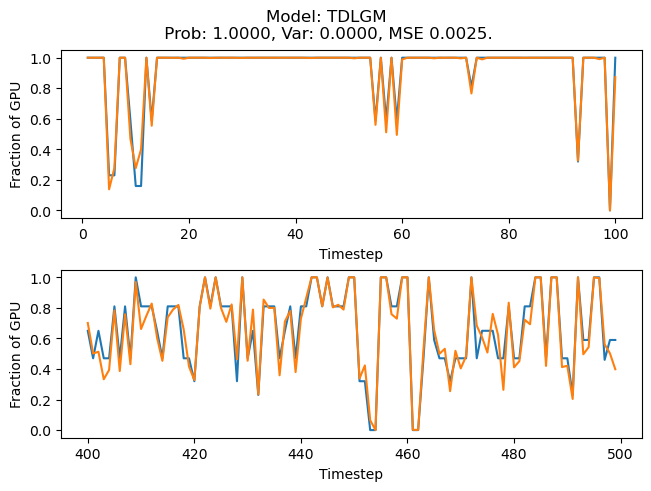

In [4]:
from data_gen import Datagen
import matplotlib.pyplot as plt

gen = Datagen(None)

_, y_val, _ = gen.get_test_data(1)


def get_file(filename="entries"):
    l = None
    with open(filename, "r") as f:
        l = json.loads(f.read())
    return l

def draw_other(y,y_t, title, name=""):
    fig, ax = plt.subplots(2, layout="constrained")
    
    ax[0].plot( range(1,101) , y_t[:100])
    ax[0].plot( range(1,101) , y[:100])
    
    ax[1].plot( range(400,500) , y_t[400:])
    ax[1].plot(range(400,500), y[400:])
    
    for a in ax:
        a.set_xlabel("Timestep")
        a.set_ylabel("Fraction of GPU")
    
    fig.suptitle(title)
    if name != "":
        fig.savefig(name)
        plt.close("all")
    else:
        plt.show()
        plt.close()



for model in types:
    data = []
    labels = []

    for i in individual_reconstruction:

            #if i["variance"] != 0 or i["probability"] != 1:
                #continue
        check = "/" + model
        if check not in i["name"]:
            continue
        print("-"*25, model.upper(), "-"*25)

        f = dh.get_file(i["name"])[0]
        for run in f["test_run"]:
            to_add = np.array([])
            for j in run["diff"]:
                to_add = np.concatenate((to_add,np.array(j)))
            score = sum([i**2 for i in to_add])/len(to_add)
            print("\t\tProb: %f, Var: %f \n\t\tScore: %f Mean: %f, Var: %f" % (run["probability"], 
                                                                  run["variance"], score,
                                                                  np.mean(to_add),
                                                                  np.var(to_add)))
            draw_other(run["results"][0], y_val, "Model: " + model.upper() + "\n Prob: %.4f, Var: %.4f, MSE %.4f." %(run["probability"], run["variance"], score))

            
                

In [5]:
for model in types:
    data = []
    labels = []

    for i in individual_reconstruction:

            #if i["variance"] != 0 or i["probability"] != 1:
                #continue
        check = "/" + model
        if check not in i["name"]:
            continue
        print("-"*25, model.upper(), "-"*25)

        f = dh.get_file(i["name"])[0]
        for run in f["test_run"]:
            to_add = np.array([])
            for j in run["diff"]:
                to_add = np.concatenate((to_add,np.array(j)))
            score = sum([i**2 for i in to_add])/len(to_add)
            print("\t\tProb: %f, Var: %f \n\t\tScore: %f Mean: %f, Var: %f" % (run["probability"], 
                                                                  run["variance"], score,
                                                                  np.mean(to_add),
                                                                  np.var(to_add)))
            #draw_other(run["results"][0], y_val, model.upper() + " Prob: %f Var: %f Score %f" %(run["probability"], run["variance"], score))

            
          

------------------------- TDLGM -------------------------
		Prob: 0.200000, Var: 0.001000 
		Score: 0.002476 Mean: -0.005332, Var: 0.002448
		Prob: 0.400000, Var: 0.010000 
		Score: 0.002604 Mean: -0.005988, Var: 0.002568
		Prob: 0.600000, Var: 0.005000 
		Score: 0.002464 Mean: -0.005731, Var: 0.002431
		Prob: 0.800000, Var: 0.050000 
		Score: 0.002559 Mean: -0.005811, Var: 0.002525
		Prob: 1.000000, Var: 0.000000 
		Score: 0.002518 Mean: -0.004745, Var: 0.002496
------------------------- TDLGM -------------------------
		Prob: 0.200000, Var: 0.001000 
		Score: 0.002476 Mean: -0.005332, Var: 0.002448
		Prob: 0.400000, Var: 0.010000 
		Score: 0.002604 Mean: -0.005988, Var: 0.002568
		Prob: 0.600000, Var: 0.005000 
		Score: 0.002464 Mean: -0.005731, Var: 0.002431
		Prob: 0.800000, Var: 0.050000 
		Score: 0.002559 Mean: -0.005811, Var: 0.002525
		Prob: 1.000000, Var: 0.000000 
		Score: 0.002518 Mean: -0.004745, Var: 0.002496
------------------------- TDLGM -------------------------
		Prob

In [6]:
import json


with open("reconstruction_scores_rnn.json", "w") as f:
    f.write(json.dumps(all_reconstruction))

print("tDLGM", dh.lowest_future_eval(types["tdlgm"]))
print("rnn", dh.lowest_future_eval(types["rnn"]))
print("DLGM", dh.lowest_future_eval(types["dlgm"]))

tDLGM {'name': '../tdlgm/results/seq_len10,layers1,latent8,hidden32,l1e-07,variance0.01,data_prob0.8,regularization0.3333333333333333entries.json', 'value': 0.14126762612323163}


KeyError: 'rnn'

In [ ]:
print("tDLGM", dh.lowest_future_eval(types["tdlgm"]))
print("rnn", dh.lowest_future_eval(types["rnn"]))
print("DLGM", dh.lowest_future_eval(types["dlgm"]))

In [ ]:
dh.distribution_width("../tdlgm/results", 0.8)

In [ ]:
dh.best_future_eval_sum(types["tdlgm"])

In [ ]:
dh.best_future_eval_sum(types["tdlgm"])

In [ ]:
dh.best_reconstruction(types["tdlgm"])

In [ ]:
dh.best_reconstruction(types["tdlgm"])